# Dota challendge

See the description: [Kaggle](https://www.kaggle.com/competitions/bi-ml-competition-2023/overview)

# import data and libraries

In [ ]:
# test data
! gdown 1hXo6e3s30kAS6zglFEHNRTBhMuarf7VC
# test raw data
! gdown 1RKROdHPYXrCiQB0NxHg6Crdy8NsdSNWK

# train data
! gdown 1Hc2qDJH9OW2e53tMus3-IcZwcVXHGkKz
# train targets
! gdown 1ivvMZfJZyG8OqJWOK_aMG7Dwmz1vGGXH
# train raw data
! gdown 1BUZf-LGpfAOoPew6npN7T1q9z-ZsgSWX

Downloading...
From: https://drive.google.com/uc?id=1hXo6e3s30kAS6zglFEHNRTBhMuarf7VC
To: /content/test_data.csv
100% 7.10M/7.10M [00:00<00:00, 44.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RKROdHPYXrCiQB0NxHg6Crdy8NsdSNWK
To: /content/test_raw_data.jsonl
100% 601M/601M [00:04<00:00, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Hc2qDJH9OW2e53tMus3-IcZwcVXHGkKz
To: /content/train_data.csv
100% 28.2M/28.2M [00:00<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ivvMZfJZyG8OqJWOK_aMG7Dwmz1vGGXH
To: /content/train_targets.csv
100% 1.81M/1.81M [00:00<00:00, 163MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BUZf-LGpfAOoPew6npN7T1q9z-ZsgSWX
To: /content/train_raw_data.jsonl
100% 2.40G/2.40G [00:21<00:00, 111MB/s]


In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.1 MB/s eta 0:00:00


In [ ]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# general
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import math
import pandas as pd
import time
import re
import json

from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr
from itertools import combinations


# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import BaseEstimator, clone
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor,
                              ExtraTreesClassifier, VotingClassifier,
                              AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.tree import (DecisionTreeRegressor,
                          DecisionTreeClassifier)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

import xgboost
import lightgbm
import catboost

# neural nets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# establish seed and silence warnings
warnings.filterwarnings("ignore")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
df_test = pd.read_csv('/content/test_data.csv', index_col="match_id_hash")
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7977 entries, a400b8f29dece5f4d266f49f1ae2e98a to 9928dfde50efcbdb2055da23dcdbc101
Columns: 245 entries, game_time to d5_sen_placed
dtypes: float64(30), int64(215)
memory usage: 15.0+ MB
None


,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.000,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.000,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.250,0,0,0,0
ab3cc6ccac661a1385e73a2e9f21313a,721,4,0,2,1,30,2,2,1,3,...,0.000000,0,0,1,0,0.125,0,0,0,0
54aaab1cb8cc5df3c253641618673266,752,22,7,1,0,8,2,0,2,8,...,0.766459,0,0,1,0,1.000,0,0,0,0


In [ ]:
for col in df_test.columns:
  print(col, df_test[col].dtype, sep='\t')

game_time	int64
game_mode	int64
lobby_type	int64
objectives_len	int64
chat_len	int64
r1_hero_id	int64
r1_kills	int64
r1_deaths	int64
r1_assists	int64
r1_denies	int64
r1_gold	int64
r1_lh	int64
r1_xp	int64
r1_health	int64
r1_max_health	int64
r1_max_mana	float64
r1_level	int64
r1_x	int64
r1_y	int64
r1_stuns	float64
r1_creeps_stacked	int64
r1_camps_stacked	int64
r1_rune_pickups	int64
r1_firstblood_claimed	int64
r1_teamfight_participation	float64
r1_towers_killed	int64
r1_roshans_killed	int64
r1_obs_placed	int64
r1_sen_placed	int64
r2_hero_id	int64
r2_kills	int64
r2_deaths	int64
r2_assists	int64
r2_denies	int64
r2_gold	int64
r2_lh	int64
r2_xp	int64
r2_health	int64
r2_max_health	int64
r2_max_mana	float64
r2_level	int64
r2_x	int64
r2_y	int64
r2_stuns	float64
r2_creeps_stacked	int64
r2_camps_stacked	int64
r2_rune_pickups	int64
r2_firstblood_claimed	int64
r2_teamfight_participation	float64
r2_towers_killed	int64
r2_roshans_killed	int64
r2_obs_placed	int64
r2_sen_placed	int64
r3_hero_id	int64
r3

In [ ]:
df_index = pd.read_csv('/content/train_data.csv', 
                       index_col="match_id_hash")
df_train.index = df_index.index

In [ ]:
df_train = pd.read_csv('/content/train_data.csv', 
                       index_col="match_id_hash")
result_train = pd.read_csv('/content/train_targets.csv', 
                           index_col="match_id_hash")
print(df_train.info())
result_train

<class 'pandas.core.frame.DataFrame'>
Index: 31698 entries, b9c57c450ce74a2af79c9ce96fac144d to e2ca68ac1a6847f4a37f6c9c8ee8695b
Columns: 245 entries, game_time to d5_sen_placed
dtypes: float64(30), int64(215)
memory usage: 59.5+ MB
None


,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
19c39fe2af2b547e48708ca005c6ae74,160,False,2063,1903,NaN
c96d629dc0c39f0c616d1949938a6ba6,1016,True,2147,1131,Radiant
156c88bff4e9c4668b0f53df3d870f1b,582,False,1927,1345,Dire
...,...,...,...,...,...
b794aa55646841a03c7783226e6f6bc8,2666,False,2701,35,NaN
308faee28efee2e66b39f9f2ba6ea9cf,2525,True,3358,833,Radiant
6066cc7417b43c749d551e123d00f0c8,1002,True,2217,1215,Dire


# Data exploration

In [ ]:
print("The matches ID's are identical for results and train df's:", all(result_train.index == df_train.index))

The matches ID's are identical for results and train df's: True


In [ ]:
print("The columns in train and test df's are identical:", all(df_train.columns == df_test.columns))

The columns in train and test df's are identical: True


In [ ]:
print('Can we find the columns from results in train?')
print('duration' in df_train.columns, 
      'time_remaining' in df_train.columns)

Can we find the columns from results in train?
False False


In [ ]:
# let's have a look at the set of characteristics per player
[col_clean for col_clean in df_train.columns if 'd3' in col_clean]

['d3_hero_id',
 'd3_kills',
 'd3_deaths',
 'd3_assists',
 'd3_denies',
 'd3_gold',
 'd3_lh',
 'd3_xp',
 'd3_health',
 'd3_max_health',
 'd3_max_mana',
 'd3_level',
 'd3_x',
 'd3_y',
 'd3_stuns',
 'd3_creeps_stacked',
 'd3_camps_stacked',
 'd3_rune_pickups',
 'd3_firstblood_claimed',
 'd3_teamfight_participation',
 'd3_towers_killed',
 'd3_roshans_killed',
 'd3_obs_placed',
 'd3_sen_placed']

In [ ]:
# let's have a look what we have in the raw data

with open("test_raw_data.jsonl") as test_raw:
  # read the first line
  for i in range(1):
    line = json.loads(test_raw.readline())

line

{'game_time': 155,
 'match_id_hash': 'a400b8f29dece5f4d266f49f1ae2e98a',
 'teamfights': [],
 'objectives': [{'time': 124.203,
   'type': 'CHAT_MESSAGE_FIRSTBLOOD',
   'slot': 8,
   'key': 2,
   'player_slot': 131}],
 'chat': [{'player_slot': 0, 'time': -13.63, 'text': '???'},
  {'player_slot': 0, 'time': -10.964, 'text': '? ???? ??????'},
  {'player_slot': 0, 'time': -7.965, 'text': '???????? ????('},
  {'player_slot': 4, 'time': 43.756, 'text': '???'},
  {'player_slot': 2, 'time': 44.422, 'text': '??? ??????'},
  {'player_slot': 4, 'time': 45.289, 'text': '*[*[*['},
  {'player_slot': 2, 'time': 46.622, 'text': '????'},
  {'player_slot': 4, 'time': 47.355, 'text': '??? ??????'},
  {'player_slot': 4, 'time': 48.688, 'text': '????'},
  {'player_slot': 2, 'time': 52.021, 'text': '???????? ??? ??????'},
  {'player_slot': 4, 'time': 73.349, 'text': '????? ??? ?????'}],
 'game_mode': 22,
 'lobby_type': 7,
 'players': [{'player_slot': 0,
   'hero_id': 11,
   'hero_name': 'npc_dota_hero_neverm

There are a lot of characteristics. U can notice that the ones without nested dictionaries as values are already in the original dataset. So, let's have a look per player

In [ ]:
line['players'][0]

{'player_slot': 0,
 'hero_id': 11,
 'hero_name': 'npc_dota_hero_nevermore',
 'account_id_hash': '86bf86c5488742478688149155258ea8',
 'ability_upgrades': [],
 'obs_placed': 0,
 'sen_placed': 0,
 'creeps_stacked': 0,
 'camps_stacked': 0,
 'rune_pickups': 1,
 'firstblood_claimed': 0,
 'teamfight_participation': 0,
 'towers_killed': 0,
 'roshans_killed': 0,
 'observers_placed': 0,
 'stuns': 0,
 'max_hero_hit': {'type': 'max_hero_hit',
  'time': 94.977,
  'max': True,
  'inflictor': 'nevermore_shadowraze2',
  'unit': 'npc_dota_hero_nevermore',
  'key': 'npc_dota_hero_tinker',
  'value': 136,
  'slot': 0,
  'player_slot': 0},
 'times': [0, 60, 120],
 'gold_t': [1, 91, 356],
 'lh_t': [0, 0, 4],
 'dn_t': [0, 0, 0],
 'xp_t': [0, 107, 387],
 'obs_log': [],
 'sen_log': [],
 'obs_left_log': [],
 'sen_left_log': [],
 'purchase_log': [{'time': -89.783, 'key': 'wraith_band'},
  {'time': -89.783, 'key': 'enchanted_mango'},
  {'time': -89.783, 'key': 'tpscroll'},
  {'time': -84.215, 'key': 'tango'},
  

# Data transformation

In [ ]:
## let's define a few functions to get these new feautures into the original df's

def sum_valuer(col):
  '''
  Gets the sum of values from the dictionary if it exists
  '''
  return (0, sum(col.values()))[int(bool(col))]


def df_remodeller(df_all0):
  '''
  From the n x m df where columns are features and rows are players (see df_all)
  it transforms this df 
  into a 1 x nxm dataframe with columns as player_feature
  '''
  # Reset the index to convert it into a column
  df = df_all0.reset_index()

  # Use the melt function to transform the DataFrame into long format
  df = pd.melt(df, id_vars='index', value_vars=df_all0.columns)

  # Combine the index column and the variable column to create new column names
  df['index'] = df['index'] + '_' + df['variable']

  # Set the combined column names as the index
  df = df.set_index('index')

  # Rename the value column to the desired column name
  df = df.rename(columns={'value': 'index_column'})

  # Drop the variable column
  df = df.drop(columns='variable')

  # Transpose the DataFrame to get the desired 1D format
  return df.T

In [ ]:
# let's add some characteristics from the raw data

storage_df = pd.DataFrame()

# from these features, sum of there values would be extacted
col_need = ['damage', 'damage_taken', 'damage_inflictor', 'killed',
            'runes', 'ability_uses', 'healing', 'hero_hits',
            'item_uses', 'multi_kills', 'purchase', 'killed_by']
sum_need = ['nearby_creep_death_count', 'camps_stacked', 
            'creeps_stacked', 'rune_pickups']

with open("test_raw_data.jsonl") as fin:
  # as the amount of lines is the same as for original df
  for i in range(len(df_test)):
    line = json.loads(fin.readline())
    df_all = pd.DataFrame()
    for p in line['players']:
      values_need = [sum_valuer(p[i]) for i in col_need]
      df_zero = pd.DataFrame([p[i] for i in sum_need] + values_need)
      df_all = pd.concat([df_all, df_zero.T])

    df_all = df_all.rename(columns=dict(zip(range(len(df_all.columns)), sum_need + col_need)))
    df_all.index = [f'r{i}' for i in range(1,6)]+[f'd{i}' for i in range(1,6)]
    storage_df = pd.concat([storage_df, df_remodeller(df_all).set_index(np.array([line['match_id_hash']]))])
  
df_all

,nearby_creep_death_count,camps_stacked,creeps_stacked,rune_pickups,damage,damage_taken,damage_inflictor,killed,runes,ability_uses,healing,hero_hits,item_uses,multi_kills,purchase,killed_by
r1,189,0,0,16,16837,5564,11216,3381,16,53,633,237,147,0,51,4
r2,211,0,0,7,58748,20237,10982,21152,7,55,790,266,113,0,39,7
r3,325,0,0,3,98858,12125,16408,41488,3,265,1515,157,56,4,53,0
r4,271,1,1,6,113406,17120,8651,34281,6,131,831,119,86,0,41,5
r5,236,1,2,2,35399,8191,12984,7394,2,134,518,299,65,2,58,4
d1,237,0,0,8,60071,20956,6656,18820,8,59,965,108,68,0,32,7
d2,152,1,2,13,41003,12443,8166,3285,13,137,114,266,54,0,63,10
d3,150,0,0,4,9789,8953,7155,2602,4,91,1230,140,36,0,37,4
d4,283,1,2,12,99251,15120,13440,19036,12,122,643,545,59,1,50,3
d5,320,0,0,1,137446,18352,10138,33420,1,167,1345,125,121,0,38,6


In [ ]:
storage_df.head()

index,r1_nearby_creep_death_count,r2_nearby_creep_death_count,r3_nearby_creep_death_count,r4_nearby_creep_death_count,r5_nearby_creep_death_count,d1_nearby_creep_death_count,d2_nearby_creep_death_count,d3_nearby_creep_death_count,d4_nearby_creep_death_count,d5_nearby_creep_death_count,...,r1_killed_by,r2_killed_by,r3_killed_by,r4_killed_by,r5_killed_by,d1_killed_by,d2_killed_by,d3_killed_by,d4_killed_by,d5_killed_by
a400b8f29dece5f4d266f49f1ae2e98a,19,19,6,14,12,30,23,14,20,17,...,0,0,1,0,0,0,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,59,69,82,51,106,69,73,80,33,75,...,0,0,1,1,0,0,3,1,2,1
b1b35ff97723d9b7ade1c9c3cf48f770,47,53,54,48,36,60,47,61,43,65,...,1,0,1,0,2,0,0,0,1,1
ab3cc6ccac661a1385e73a2e9f21313a,77,92,107,82,90,66,93,78,62,99,...,2,2,2,1,1,5,1,1,0,2
54aaab1cb8cc5df3c253641618673266,108,106,74,66,85,80,59,94,95,84,...,0,0,1,1,2,0,1,3,2,3


In [ ]:
print('The list of matches is the same for original and raw data:', all(df_test.index == storage_df.index))

The list of matches is the same for original and row data: True


In [ ]:
df_test = pd.concat([df_test, storage_df], axis=1)

In [ ]:
# the same procedure but for df_train

storage_df = pd.DataFrame()

with open("train_raw_data.jsonl") as fin:
  # as the amount of lines is the same as for original df
  for i in range(len(df_train)):
    line = json.loads(fin.readline())
    df_all = pd.DataFrame()
    for p in line['players']:
      values_need = [sum_valuer(p[i]) for i in col_need]
      df_zero = pd.DataFrame([p[i] for i in sum_need] + values_need)
      df_all = pd.concat([df_all, df_zero.T])

    df_all = df_all.rename(columns=dict(zip(range(len(df_all.columns)), sum_need + col_need)))
    df_all.index = [f'r{i}' for i in range(1,6)]+[f'd{i}' for i in range(1,6)]
    storage_df = pd.concat([storage_df, df_remodeller(df_all).set_index(np.array([line['match_id_hash']]))])

In [ ]:
print('The list of matches is the same for original and raw data:', all(df_train.index == storage_df.index))

The list of matches is the same for original and row data: True


In [ ]:
df_train = pd.concat([df_train, storage_df], axis=1)

In [ ]:
# let's create a function defining at with side a player is
def is_point_in_upper_right_rect(x, y, x1=66, y1=186, x2=188, y2=186):
  slope = (y2-y1) / (x2-x1)
  y_on_diagonal = y1 + slope * (np.array(x) - x1)
  return np.array(y) > y_on_diagonal

def is_point_in_lower_left_rect(x, y, x1=66, y1=186, x2=188, y2=186):
  slope = (y2-y1) / (x2-x1)
  y_on_diagonal = y1 + slope * (np.array(x) - x1)
  return np.array(y) < y_on_diagonal

In [ ]:
# a new dataframe where only info per team is presented
df_train_new = pd.DataFrame()

# as the data per player is excessive than let's grab the mean per team:
mean_list = ['kills', 'deaths', 'assists', 'denies', 'stuns', 'health', 
            'camps_stacked', 'lh', 'rune_pickups', 'firstblood_claimed',
            'towers_killed', 'roshans_killed', 'creeps_stacked', 'corner',
             'level', 'xp', 'gold', 'max_health', 'max_mana', 'stuns', 'distance',
             'teamfight_participation', 'obs_placed', 'sen_placed', 'KDA']

for i in range(1,6): 
  # create KDA per player
  df_train[f'r{i}_KDA'] = (df_train[f'r{i}_kills'] - df_train[f'r{i}_assists']) / df_train[f'r{i}_deaths'].replace(0, 1e-2)
  df_train[f'd{i}_KDA'] = (df_train[f'd{i}_kills'] - df_train[f'd{i}_assists']) / df_train[f'd{i}_deaths'].replace(0, 1e-2)

  # create a distance from a camp (dark for light and light for dark) per player
  df_train[f'r{i}_distance'] = ((188 - df_train[f'r{i}_x'])**2 + (186 - df_train[f'r{i}_y'])**2)**0.5
  df_train[f'd{i}_distance'] = ((66 - df_train[f'd{i}_x'])**2 + (70 - df_train[f'd{i}_y'])**2)**0.5

  # create a bool value marking if a player on it's side or the opposite one
  df_train[f'r{i}_corner'] = is_point_in_upper_right_rect(df_train[f'r{i}_x'], df_train[f'r{i}_y'])
  df_train[f'd{i}_corner'] = is_point_in_lower_left_rect(df_train[f'd{i}_x'], df_train[f'd{i}_y'])


# per feature per team
for feat in mean_list+sum_need+col_need:
  for campus in ['d', 'r']:
    # compile all columns with that feature 
    pattern = re.compile(r'^' + campus + '\d_' + feat + '$')
    mean_cols = [col for col in df_train.columns if pattern.match(col)]
    # and create a new column as a mean of all team
    df_train_new[f'{campus}_{feat}'] = df_train[mean_cols].mean(axis=1)
  
  # calculate a delta between dark and light
  df_train_new[f'delta_{feat}'] = df_train_new[f'd_{feat}'] - df_train_new[f'r_{feat}']

df_train_new

,d_kills,r_kills,delta_kills,d_deaths,r_deaths,delta_deaths,d_assists,r_assists,delta_assists,d_denies,...,delta_item_uses,d_multi_kills,r_multi_kills,delta_multi_kills,d_purchase,r_purchase,delta_purchase,d_killed_by,r_killed_by,delta_killed_by
b9c57c450ce74a2af79c9ce96fac144d,0.6,3.2,-2.6,3.2,0.8,2.4,0.6,2.8,-2.2,3.2,...,-7.2,0.0,0.6,-0.6,18.0,21.4,-3.4,3.2,0.8,2.4
6db558535151ea18ca70a6892197db41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,3.6,4.2,-0.6,0.0,0.0,0.0
19c39fe2af2b547e48708ca005c6ae74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.6,0.0,0.0,0.0,6.4,7.4,-1.0,0.0,0.0,0.0
c96d629dc0c39f0c616d1949938a6ba6,2.2,1.8,0.4,2.0,2.4,-0.4,2.6,2.4,0.2,7.6,...,-6.8,0.0,0.4,-0.4,19.2,22.4,-3.2,2.0,2.4,-0.4
156c88bff4e9c4668b0f53df3d870f1b,2.0,1.2,0.8,1.2,2.0,-0.8,2.0,1.4,0.6,8.8,...,-8.0,0.2,0.2,0.0,17.2,16.6,0.6,1.2,2.0,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b794aa55646841a03c7783226e6f6bc8,7.6,6.2,1.4,6.8,8.2,-1.4,17.2,11.8,5.4,6.0,...,40.8,1.2,0.8,0.4,51.6,42.8,8.8,7.0,8.2,-1.2
308faee28efee2e66b39f9f2ba6ea9cf,3.6,5.2,-1.6,5.6,3.8,1.8,3.0,7.4,-4.4,11.2,...,-30.4,0.0,0.8,-0.8,44.8,45.8,-1.0,5.8,4.2,1.6
6066cc7417b43c749d551e123d00f0c8,3.6,1.2,2.4,1.4,3.6,-2.2,5.4,2.2,3.2,2.0,...,10.6,0.6,0.0,0.6,16.2,14.8,1.4,1.4,4.0,-2.6
bc7a87ed5f9c2bca55f9f7a93da0b0c5,0.4,0.4,0.0,0.4,0.6,-0.2,0.2,0.6,-0.4,5.2,...,1.6,0.0,0.0,0.0,9.8,10.8,-1.0,0.4,0.6,-0.2


In [ ]:
# the same but for test
df_test_new = pd.DataFrame()

for i in range(1,6): 
  # create KDA per player
  df_test[f'r{i}_KDA'] = (df_test[f'r{i}_kills'] - df_test[f'r{i}_assists']) / df_test[f'r{i}_deaths'].replace(0, 1e-2)
  df_test[f'd{i}_KDA'] = (df_test[f'd{i}_kills'] - df_test[f'd{i}_assists']) / df_test[f'd{i}_deaths'].replace(0, 1e-2)

  # create a distance from a camp (dark for light and light for dark) per player
  df_test[f'r{i}_distance'] = ((188 - df_test[f'r{i}_x'])**2 + (186 - df_test[f'r{i}_y'])**2)**0.5
  df_test[f'd{i}_distance'] = ((66 - df_test[f'd{i}_x'])**2 + (70 - df_test[f'd{i}_y'])**2)**0.5

  # create a bool value marking if a player on it's side or the opposite one
  df_test[f'r{i}_corner'] = is_point_in_upper_right_rect(df_test[f'r{i}_x'], df_test[f'r{i}_y'])
  df_test[f'd{i}_corner'] = is_point_in_lower_left_rect(df_test[f'd{i}_x'], df_test[f'd{i}_y'])


# per feature per team
for feat in mean_list+sum_need+col_need:
  for campus in ['d', 'r']:
    # compile all columns with that feature 
    pattern = re.compile(r'^' + campus + '\d_' + feat + '$')
    mean_cols = [col for col in df_test.columns if pattern.match(col)]
    # and create a new column as a mean of all team
    df_test_new[f'{campus}_{feat}'] = df_test[mean_cols].mean(axis=1)
  
  # calculate a delta between dark and light
  df_test_new[f'delta_{feat}'] = df_test_new[f'd_{feat}'] - df_test_new[f'r_{feat}']

In [ ]:
# if u want to take only delta data 

delta_list = [col for col in df_train_new.columns if 'delta' in col]
df_train_new = df_train_new.loc[:, delta_list]
df_test_new = df_test_new.loc[:, delta_list]

In [ ]:
# do not forget to include the general info about a match
for col in df_test.columns[:5]:
  df_test_new[col] = df_test[col]

for col in df_train.columns[:5]:
  df_train_new[col] = df_train[col]

In [ ]:
df_train.columns[:5]

Index(['game_time', 'game_mode', 'lobby_type', 'objectives_len', 'chat_len'], dtype='object')

In [ ]:
[i[6:] for i in df_train_new.columns[:-5]]

['kills',
 'deaths',
 'assists',
 'denies',
 'stuns',
 'health',
 'camps_stacked',
 'lh',
 'rune_pickups',
 'firstblood_claimed',
 'towers_killed',
 'roshans_killed',
 'creeps_stacked',
 'corner',
 'level',
 'xp',
 'gold',
 'max_health',
 'max_mana',
 'distance',
 'teamfight_participation',
 'obs_placed',
 'sen_placed',
 'KDA',
 'nearby_creep_death_count',
 'damage',
 'damage_taken',
 'damage_inflictor',
 'killed',
 'runes',
 'ability_uses',
 'healing',
 'hero_hits',
 'item_uses',
 'multi_kills',
 'purchase',
 'killed_by']

In [ ]:
# standartise
X = df_train_new

y = result_train.radiant_win.apply(int)

# create a StandardScaler object
scaler = StandardScaler()
# fit the scaler to your data
scaler.fit(X)
# transform your data
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(df_test_new)

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.3, random_state=SEED)

<Axes: >

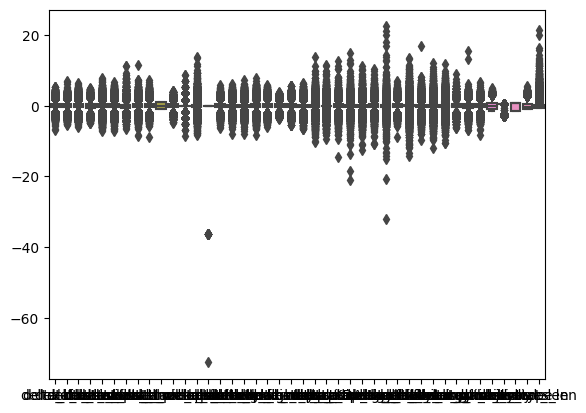

In [ ]:
sns.boxplot(data=pd.DataFrame(X_scaled, columns=df_train_new.columns))

# Machine learning

## methods

In [ ]:
# RANDOM FOREST
rf = RandomForestClassifier(criterion='log_loss', n_estimators=225,
                            max_depth=14, n_jobs=-1, random_state=SEED)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.8194795982338515


In [ ]:
# RANDOM FOREST
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8195929344842895
MSE score: 0.17295766120037778
R2 score: 0.3066716633875116


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(solver='saga', max_iter=38,
                            n_jobs=-1, random_state=SEED,
                            C=0.04, class_weight='balanced')
results = log_reg.fit(X_train, y_train)

y_pred = log_reg.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.8162021106693692


In [ ]:
# Logistic Regression
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8162021106693692
MSE score: 0.17490889751412766
R2 score: 0.2988498217971425


In [ ]:
# CatBoostClassifier
cat = catboost.CatBoostClassifier(verbose=0, loss_function='CrossEntropy',
                                  random_seed=SEED, iterations=399,
                                  border_count=2115, learning_rate=0.029)
results = cat.fit(X_train, y_train)

y_pred = cat.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.8216452203926887


In [ ]:
# CatBoostClassifier
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8216452203926887
MSE score: 0.17176189614769918
R2 score: 0.31146507808333423


In [ ]:
# ExtraTreesClassifier
etc = ExtraTreesClassifier(n_jobs=-1, random_state=SEED,
                          criterion='log_loss', max_depth=14,
                          min_samples_split=28, max_features=None,
                          class_weight='balanced_subsample', 
                          bootstrap=True, n_estimators=220)
results = etc.fit(X_train, y_train)

y_pred = etc.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.8188783000041132


In [ ]:
# ExtraTreesClassifier
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8191600671312285
MSE score: 0.17321790946371107
R2 score: 0.30562841676709096


In [ ]:
# KNeighborsClassifier
kn_r = KNeighborsClassifier(n_neighbors=292, p=1, algorithm='ball_tree',
                            n_jobs=-1, metric='canberra')
results = kn_r.fit(X_train, y_train)

y_pred = kn_r.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.8078253783134786


In [ ]:
# baseline bisness: KNeighborsClassifier
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.808644063183918
MSE score: 0.17791739157545003
R2 score: 0.2867897941073102


In [ ]:
# DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8, random_state=SEED,
                              criterion='log_loss',
                              min_samples_leaf=501,
                              min_weight_fraction_leaf=0.01,
                              class_weight='balanced')
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.8047973457421383


In [ ]:
# baseline bisness: DecisionTreeClassifier
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8072217530782073
MSE score: 0.17904254413630571
R2 score: 0.28227944083334


In [ ]:
# SVC
svc = SVC(kernel='rbf', gamma='auto', probability=True, tol=1e-5,
          random_state=SEED, C=0.25, class_weight='balanced')
svc.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = svc.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.8007474253124305 0.05
ROC-AUC score: 0.8039072993686855 0.1
ROC-AUC score: 0.8052006933678658 0.15000000000000002
ROC-AUC score: 0.8057519942215798 0.2
ROC-AUC score: 0.8058327745565126 0.25
ROC-AUC score: 0.8057000465932993 0.3
ROC-AUC score: 0.8055705321139174 0.35000000000000003


In [ ]:
# SVC
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

In [ ]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = gnb.predict_proba(X_valid)[:, 1]

In [ ]:
# baseline bisness: GaussianNB
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8002880079343353
MSE score: 0.23183282766303254
R2 score: 0.07066117996611221


In [ ]:
# XGBClassifier RF
xgb_rf = xgboost.XGBRFClassifier(max_depth=7, learning_rate=0.39,
                                random_state=SEED, gamma=0.47,
                                objective='reg:squaredlogerror',
                                n_jobs=-1)
xgb_rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = xgb_rf.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.8161034677967256


In [ ]:
# XGBClassifier RF
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8158825130808738
MSE score: 0.20042038686296534
R2 score: 0.19658295283061067


In [ ]:
# XGBClassifier
xgb = xgboost.XGBClassifier(random_state=SEED, n_jobs=-1, 
                            learning_rate=0.011,
                            objective='binary:logitraw',
                            booster='gblinear', n_estimators=985)
xgb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = xgb.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.816232915790235


In [ ]:
# XGBClassifier
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.815994165022545
MSE score: 3.4114691802451684
R2 score: -12.675417646888173


In [ ]:
# LGBMClassifier RF
lgbm_rf = lightgbm.LGBMClassifier(random_state=SEED, n_jobs=-1,
                                  n_estimators=304, silent=True,
                                  verbose=0, boosting_type='dart',
                                  learning_rate=0.09, max_depth=6,
                                  min_child_samples=31,
                                  class_weight='balanced',
                                  min_split_gain=0.53, num_leaves=13)
                                  # bagging_freq=1, bagging_fraction=0.7)
lgbm_rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lgbm_rf.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
ROC-AUC score: 0.8208437553631937


In [ ]:
# LGBMClassifier RF
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8208437553631937
MSE score: 0.1728281784136946
R2 score: 0.3071907157641912


In [ ]:
# LGBMClassifier
lgbm = lightgbm.LGBMClassifier(random_seed=SEED, n_jobs=-1, 
                              n_estimators=320, num_leaves=5)
lgbm.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lgbm.predict_proba(X_valid)[:, 1]
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))

ROC-AUC score: 0.8207790867713327


In [ ]:
# LGBMClassifier
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8207790867713327
MSE score: 0.17234056574580062
R2 score: 0.30914538881883225


## predict

In [251]:
# let's play a little bit and find a perfect set of approaches
ada = AdaBoostClassifier(n_estimators=90, random_state=SEED,
                         estimator=lgbm)
gb = GradientBoostingClassifier(n_estimators=300, random_state=SEED,
                                learning_rate=0.001)

base_models = [
              #  ("DT", dt),
              #  ("XGB", xgb),   
              #  ("LR", lr),
               
              #  ("ETC", etc),  
              #  ("KNN", knn), 
              #  ("SVC", svc), 
               
               ("CAT", cat), 
               ("LGBM", lgbm), 
               ("LGBM_RF", lgbm_rf), 

               ("RF", rf),
              #  ("XGB_RF", xgb_rf), 
              #  ("NB", gnb),
               
               ('ada', ada), 
              #  ('gb', gb)
               ]

In [252]:
# Create voting classifier
ensemble = VotingClassifier(estimators=base_models, voting='soft', 
                            n_jobs=-1)

# Fit the model
ensemble.fit(X_train, y_train)

# Make predictions on test set
y_pred = ensemble.predict_proba(X_valid)[:, 1]

# Evaluate performance
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8222906652416824
MSE score: 0.1745918992398191
R2 score: 0.30012055987668185


In [355]:
ensemble

VotingClassifier(estimators=[('CAT',
                              <catboost.core.CatBoostClassifier object at 0x7f93d8d8c2b0>),
                             ('LGBM',
                              LGBMClassifier(n_estimators=320, num_leaves=5,
                                             random_seed=111)),
                             ('LGBM_RF',
                              LGBMClassifier(boosting_type='dart',
                                             class_weight='balanced',
                                             learning_rate=0.09, max_depth=6,
                                             min_child_samples=31,
                                             min_split_gain=0.53,
                                             n_estimators=304, num_leaves=13,
                                             random_state=111, silent=True,
                                             verbose=0)),
                             ('RF',
                              RandomForestClassifier(criterion='log_loss',
                                                     max_depth=14,
                                                     n_estimators=225,
                                                     n_jobs=-1,
                                                     random_state=111)),
                             ('ada',
                              AdaBoostClassifier(estimator=LGBMClassifier(n_estimators=320,
                                                                          num_leaves=5,
                                                                          random_seed=111),
                                                 n_estimators=90,
                                                 random_state=111))],
                 n_jobs=-1, voting='soft')

In [253]:
y_test_pred_ml = ensemble.predict_proba(X_test_scaled)[:, 1] 

# Neural nets

In [349]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='linear', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Predict on test set
y_pred = model.predict(X_valid)

Epoch 1/100
694/694 [==============================] - 2s 2ms/step - loss: 0.6048 - accuracy: 0.6549 - val_loss: 0.5363 - val_accuracy: 0.7150
Epoch 2/100
694/694 [==============================] - 2s 2ms/step - loss: 0.5560 - accuracy: 0.7052 - val_loss: 0.5297 - val_accuracy: 0.7226
Epoch 3/100
694/694 [==============================] - 3s 4ms/step - loss: 0.5492 - accuracy: 0.7123 - val_loss: 0.5269 - val_accuracy: 0.7268
Epoch 4/100
694/694 [==============================] - 3s 4ms/step - loss: 0.5414 - accuracy: 0.7152 - val_loss: 0.5246 - val_accuracy: 0.7272
Epoch 5/100
694/694 [==============================] - 3s 4ms/step - loss: 0.5374 - accuracy: 0.7166 - val_loss: 0.5226 - val_accuracy: 0.7269
Epoch 6/100
694/694 [==============================] - 2s 3ms/step - loss: 0.5348 - accuracy: 0.7199 - val_loss: 0.5215 - val_accuracy: 0.7273
Epoch 7/100
694/694 [==============================] - 2s 2ms/step - loss: 0.5327 - accuracy: 0.7231 - val_loss: 0.5212 - val_accuracy: 0.7273

In [350]:
print("ROC-AUC score:", roc_auc_score(y_valid, y_pred))
print("MSE score:", mean_squared_error(y_valid, y_pred))
print("R2 score:", r2_score(y_valid, y_pred))

ROC-AUC score: 0.8194737253151252
MSE score: 0.17293498995548626
R2 score: 0.30676254468412767


In [351]:
y_test_pred_nn = model.predict(X_test_scaled)

250/250 [==============================] - 0s 1ms/step


# send

In [352]:
# combine machine learning and neural nets
y_pred_combined = 0.35 * y_test_pred_nn.ravel() + 0.65 * y_test_pred_ml.ravel()

In [354]:
# save the answer
pd.DataFrame([df_test.index, y_pred_combined], 
             index=['match_id_hash', 'radiant_win_prob']).T.to_csv('results_test.csv', index=False)